# **Synthetic Learning Behavior Analysis: Transform**

## Objectives

* By the end of the transformation phase, I will:
    1. Encode and transform features.
    2. Run statistical tests and validate hypothesis.
    3. Visualize results and build a dashboard for communication.
    4. Build a model that is ready for real-world use.


## Inputs

* [Task outline](https://code-institute-org.github.io/5P-Assessments-Handbook/da-ai-bootcamp-capstone-prelims.html)
* Extract phase
* personalized_learning_dataset_copy.csv 


## Outputs

* Transformed dataset.
* Statistical tests that prove how features interact.
* PowerBI Dashboard.
* Logistic Regression and ML Model 

---

# Import key libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from feature_engine.encoding import OneHotEncoder
from sklearn.pipeline import Pipeline
import pingouin as pg #I need to install pingouin library to perform statistical tests.


In [ ]:
pip install pingouin

Freezing requirements to capture pingouin library.

# Data reupload

In [4]:
df = pd.read_csv("../data/copied_data/personalized_learning_dataset_copy.csv")
df.head(10)

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No
5,S00006,34,Male,Undergraduate,Web Development,184,1,87,34,70,Medium,43,Visual,4,No
6,S00007,45,Male,High School,Cybersecurity,454,3,69,46,83,Low,37,Kinesthetic,5,No
7,S00008,47,Male,High School,Cybersecurity,425,2,62,23,52,High,35,Reading/Writing,5,No
8,S00009,48,Male,Undergraduate,Cybersecurity,359,1,59,10,88,Medium,49,Reading/Writing,2,No
9,S00010,45,Female,Undergraduate,Data Science,263,4,63,30,99,Low,61,Auditory,3,No


---

# Data transformation plan

In [5]:
df_categorical_cols = df.select_dtypes(include = ["object"]) #Reviewing the categorical columns as I want to determine how I will be transforming them.
df_categorical_cols

,Student_ID,Gender,Education_Level,Course_Name,Engagement_Level,Learning_Style,Dropout_Likelihood
0,S00001,Female,High School,Machine Learning,Medium,Visual,No
1,S00002,Male,Undergraduate,Python Basics,Medium,Reading/Writing,No
2,S00003,Female,Undergraduate,Python Basics,Medium,Reading/Writing,No
3,S00004,Female,Undergraduate,Data Science,High,Visual,No
4,S00005,Female,Postgraduate,Python Basics,Medium,Visual,No
...,...,...,...,...,...,...,...
9995,S09996,Female,Undergraduate,Machine Learning,Medium,Kinesthetic,No
9996,S09997,Male,Postgraduate,Machine Learning,Medium,Reading/Writing,Yes
9997,S09998,Female,Postgraduate,Machine Learning,High,Visual,No
9998,S09999,Male,High School,Python Basics,Medium,Visual,No


In [6]:
for col in df_categorical_cols.columns[1:]: #For better visibility, looping over the columns and printing the number of unique values.
    
    print(f"{col}: ", df_categorical_cols[col].nunique(),
           df_categorical_cols[col].unique())

Gender:  3 ['Female' 'Male' 'Other']
Education_Level:  3 ['High School' 'Undergraduate' 'Postgraduate']
Course_Name:  5 ['Machine Learning' 'Python Basics' 'Data Science' 'Web Development'
 'Cybersecurity']
Engagement_Level:  3 ['Medium' 'High' 'Low']
Learning_Style:  4 ['Visual' 'Reading/Writing' 'Kinesthetic' 'Auditory']
Dropout_Likelihood:  2 ['No' 'Yes']


**My transformation plan:**

1. I do not see the requirement for the Student_ID feature. I will remove this before saving a transformed version of the file.

2. Gender: OneHotEncoder and Rare Label Encoder; values do not represent any order.

3. Education_Level: Manual ordinal encoding; I will encode using 0, 1, and 2 to handle the values.

4. Course_Name: OneHotEncoder; values do not represent any order.

5. Engagement_Level: Manual ordinal encoding; I will encode using 0, 1, and 2 to handle the values.

6. Learning_Style: OneHotEncoder; values do not represent any order.

7. Droupout_Likelihood: Manual binary encoding; I will encode using 0 and 1.

### Rationale behind my choice

As I am dealing with synthetic data, I want to control how the features are encoded. By manually encoding key features, I can decide which features have an inherent order in them and which don't. 

I will use OneHotEncoder where there is no order. While this does increase the number of features, I will use Feature_Selection while modeling.

Models process data as 0s and 1s. If I use manual encoding to assign gender or course names 0, 1, 2, and so on, it creates an illusion of order as 1 is > 0. In reality, there is no order in gender or course names.

**Explanation credit:** I iterated with ChatGPT to understand how I should encode the features. Earlier, I wanted to use manual encoding as this allows me to have a grearter control over encoding and the number of featues. However, I understood that some models are sensitive to order. Hence, I read more about encoding and changed my approach accordingly.

---

# Data transformation

I will first complete the manual encoding.

In [9]:
df["Education_Level"] = (
    df["Education_Level"].replace({
        "High School": 0, 
        "Undergraduate": 1,
        "Postgraduate": 2
        }).infer_objects(copy= False) #Adding to avoid the future warning.
        .astype(int)
        )
#Manual ordinal encoding for Education_level as it has a natural order(Postgraduate > Undergraduate > High School).

df["Engagement_Level"] = (
    df["Engagement_Level"].replace({
        "Low": 0,
        "Medium": 1,
        "High": 2
    }).infer_objects(copy= False)
    .astype(int)
    )
#Manual ordinal encoding for Engagement_Level as it has a natural order (High > Medium > Low).

df["Dropout_Likelihood"] = (
    df["Dropout_Likelihood"].replace({
        "Yes": 1,
        "No": 0
        }).infer_objects(copy= False)
        .astype(int)
        )
#Manual binary encoding for Dropout_Likelihood as it is a binary feature (Yes/No).

df.head(10) #Checking the changes.

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,0,Machine Learning,171,4,67,2,89,1,51,Visual,1,0
1,S00002,49,Male,1,Python Basics,156,4,64,0,94,1,92,Reading/Writing,5,0
2,S00003,20,Female,1,Python Basics,217,2,55,2,67,1,45,Reading/Writing,1,0
3,S00004,37,Female,1,Data Science,489,1,65,43,60,2,59,Visual,4,0
4,S00005,34,Female,2,Python Basics,496,3,59,34,88,1,93,Visual,3,0
5,S00006,34,Male,1,Web Development,184,1,87,34,70,1,43,Visual,4,0
6,S00007,45,Male,0,Cybersecurity,454,3,69,46,83,0,37,Kinesthetic,5,0
7,S00008,47,Male,0,Cybersecurity,425,2,62,23,52,2,35,Reading/Writing,5,0
8,S00009,48,Male,1,Cybersecurity,359,1,59,10,88,1,49,Reading/Writing,2,0
9,S00010,45,Female,1,Data Science,263,4,63,30,99,0,61,Auditory,3,0


In [10]:
df.isnull().sum() #Checking if the transformed dataset has any null values.

Student_ID                    0
Age                           0
Gender                        0
Education_Level               0
Course_Name                   0
Time_Spent_on_Videos          0
Quiz_Attempts                 0
Quiz_Scores                   0
Forum_Participation           0
Assignment_Completion_Rate    0
Engagement_Level              0
Final_Exam_Score              0
Learning_Style                0
Feedback_Score                0
Dropout_Likelihood            0
dtype: int64

**Code credit:** I created the code for Education_Level and Dropout_Likelihood and asked Github Copilot to create a similar piece for Engagement_Level

**Thought credit:** ChatGPT recommended that I also checked for missing values.

Changes are indeed reflected. I will now progress with OneHotEncoding and then club both of these transformed features into the transformed dataset.

In [11]:
ohe = OneHotEncoder(variables = ["Gender", "Course_Name", "Learning_Style"], 
                    drop_last = True) #Dropping the last category to avoid dummy variable trap.

df_encoded = ohe.fit_transform(df) #Fitting and transforming the dataset using OneHotEncoder.
df_encoded.head(10) #Checking the transformed dataset.

,Student_ID,Age,Education_Level,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,...,Dropout_Likelihood,Gender_Female,Gender_Male,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Data Science,Course_Name_Web Development,Learning_Style_Visual,Learning_Style_Reading/Writing,Learning_Style_Kinesthetic
0,S00001,15,0,171,4,67,2,89,1,51,...,0,1,0,1,0,0,0,1,0,0
1,S00002,49,1,156,4,64,0,94,1,92,...,0,0,1,0,1,0,0,0,1,0
2,S00003,20,1,217,2,55,2,67,1,45,...,0,1,0,0,1,0,0,0,1,0
3,S00004,37,1,489,1,65,43,60,2,59,...,0,1,0,0,0,1,0,1,0,0
4,S00005,34,2,496,3,59,34,88,1,93,...,0,1,0,0,1,0,0,1,0,0
5,S00006,34,1,184,1,87,34,70,1,43,...,0,0,1,0,0,0,1,1,0,0
6,S00007,45,0,454,3,69,46,83,0,37,...,0,0,1,0,0,0,0,0,0,1
7,S00008,47,0,425,2,62,23,52,2,35,...,0,0,1,0,0,0,0,0,1,0
8,S00009,48,1,359,1,59,10,88,1,49,...,0,0,1,0,0,0,0,0,1,0
9,S00010,45,1,263,4,63,30,99,0,61,...,0,1,0,0,0,1,0,0,0,0


**Lessons Learned:**
Iterated with ChatGPT and asked it to write a OneHotEncoder code for a sampled dataset (prompt: can you show me the same through the car dataset? I want type and turn this into a practice session). Also, used [feature-engine API](https://feature-engine.trainindata.com/en/latest/api_doc/encoding/OneHotEncoder.html) to understand when to use drop_last = True.

In [13]:
df_encoded.isnull().sum() #Checking once again if the transformed dataset has any null values.

Student_ID                        0
Age                               0
Education_Level                   0
Time_Spent_on_Videos              0
Quiz_Attempts                     0
Quiz_Scores                       0
Forum_Participation               0
Assignment_Completion_Rate        0
Engagement_Level                  0
Final_Exam_Score                  0
Feedback_Score                    0
Dropout_Likelihood                0
Gender_Female                     0
Gender_Male                       0
Course_Name_Machine Learning      0
Course_Name_Python Basics         0
Course_Name_Data Science          0
Course_Name_Web Development       0
Learning_Style_Visual             0
Learning_Style_Reading/Writing    0
Learning_Style_Kinesthetic        0
dtype: int64

I want to remove the Student_ID feature as that is not really relevant for analysis.

In [14]:
df_transformed = df_encoded.drop(columns = ["Student_ID"]) #Removing the Student_ID feature as it is not relevant for analysis.

print(df_transformed.shape) #Checking the shape of the final transformed dataset.

df_transformed.head(10)

(10000, 20)


,Age,Education_Level,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Feedback_Score,Dropout_Likelihood,Gender_Female,Gender_Male,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Data Science,Course_Name_Web Development,Learning_Style_Visual,Learning_Style_Reading/Writing,Learning_Style_Kinesthetic
0,15,0,171,4,67,2,89,1,51,1,0,1,0,1,0,0,0,1,0,0
1,49,1,156,4,64,0,94,1,92,5,0,0,1,0,1,0,0,0,1,0
2,20,1,217,2,55,2,67,1,45,1,0,1,0,0,1,0,0,0,1,0
3,37,1,489,1,65,43,60,2,59,4,0,1,0,0,0,1,0,1,0,0
4,34,2,496,3,59,34,88,1,93,3,0,1,0,0,1,0,0,1,0,0
5,34,1,184,1,87,34,70,1,43,4,0,0,1,0,0,0,1,1,0,0
6,45,0,454,3,69,46,83,0,37,5,0,0,1,0,0,0,0,0,0,1
7,47,0,425,2,62,23,52,2,35,5,0,0,1,0,0,0,0,0,1,0
8,48,1,359,1,59,10,88,1,49,2,0,0,1,0,0,0,0,0,1,0
9,45,1,263,4,63,30,99,0,61,3,0,1,0,0,0,1,0,0,0,0


Transformation is now complete. Although the transformed dataset has 6 more features (including Student_ID, which I dropped) compared the original dataset, it is transformed and ready for further analysis.

## Transformed data: Upload

In [15]:
df_transformed.to_csv(
    "../data/transformed_data/personalized_learning_dataset_transformed.csv",
    index = False) #Saving the transformed dataset.

In [16]:
df_new = pd.read_csv("../data/transformed_data/personalized_learning_dataset_transformed.csv")

df_new

,Age,Education_Level,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Feedback_Score,Dropout_Likelihood,Gender_Female,Gender_Male,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Data Science,Course_Name_Web Development,Learning_Style_Visual,Learning_Style_Reading/Writing,Learning_Style_Kinesthetic
0,15,0,171,4,67,2,89,1,51,1,0,1,0,1,0,0,0,1,0,0
1,49,1,156,4,64,0,94,1,92,5,0,0,1,0,1,0,0,0,1,0
2,20,1,217,2,55,2,67,1,45,1,0,1,0,0,1,0,0,0,1,0
3,37,1,489,1,65,43,60,2,59,4,0,1,0,0,0,1,0,1,0,0
4,34,2,496,3,59,34,88,1,93,3,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26,1,162,2,87,27,73,1,68,2,0,1,0,1,0,0,0,0,0,1
9996,37,2,447,2,39,10,68,1,46,1,1,0,1,1,0,0,0,0,1,0
9997,40,2,105,4,50,23,41,2,64,1,0,1,0,1,0,0,0,1,0,0
9998,44,0,245,2,84,39,85,1,38,2,0,0,1,0,1,0,0,1,0,0


---

# Correlation analysis

Now that I've transformed the data, let me run a correlation analysis to detect any linear correlation.

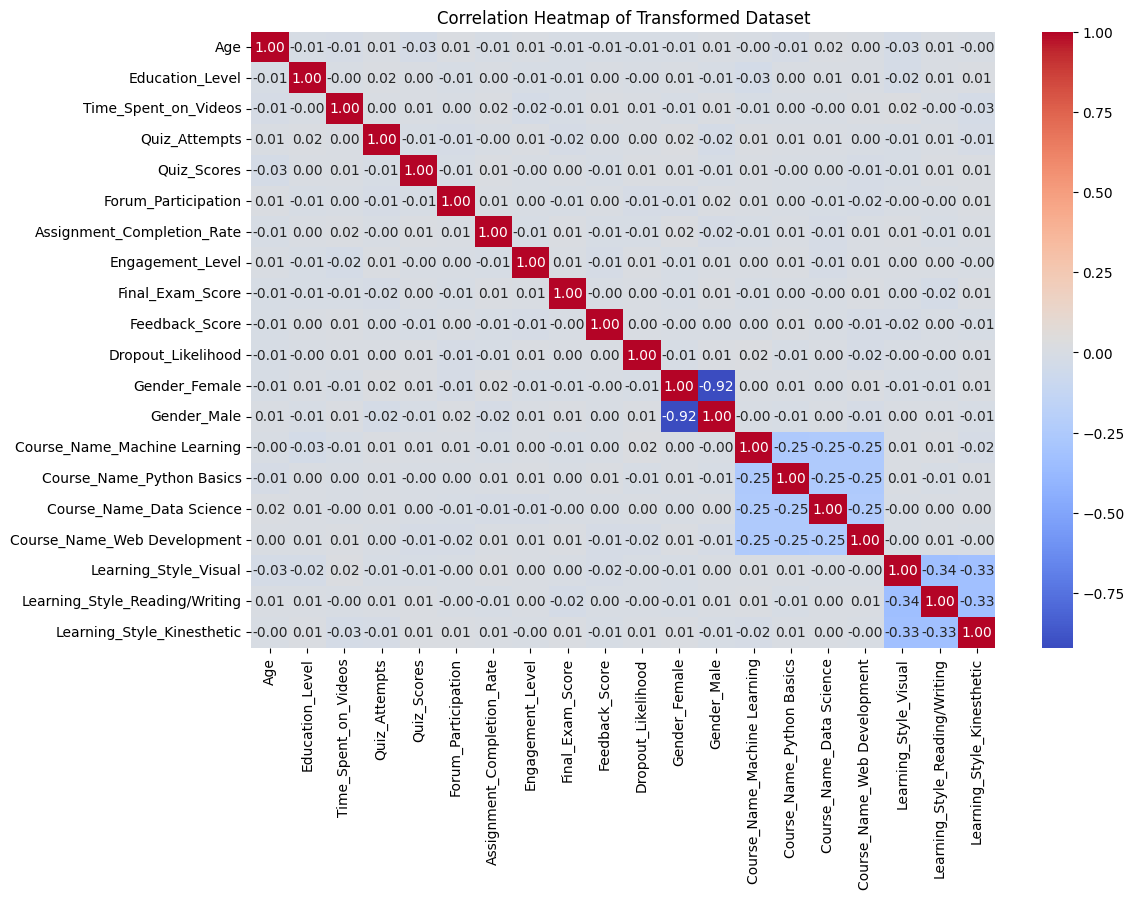

In [17]:
plt.figure(figsize = (12, 8)) #Setting the figure size for the heatmap.
sns.heatmap(df_new.corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap of Transformed Dataset");

**Key observation:** The correlation heatmap is rather flat with values scores close to 0. Maybe, because the data is engineered, there are no linear correlations. I will test the hypothesis to discover non-linear relationships.

## Challenge

In the real world, features such as Time_Spent_on_Videos and Engagement_Level are more likely to have a linear correlation. However, the synthetic dataset doesn't display such rich feature correlation. It could be most likely because of the fact that the data is engineered.

## Solution

1. The correlation table alone does not convey the entire picture. Some features could have a non-linear relationship and to test that, I will be testing hypotheses next.

2. The dataset will still work as a good starting point to understand how learning behaviors work in the real world. We can build placeholder models which can then be replaced with live data.

---

# Methodology

Explaining core research methodology concepts that help contextualize the statistical test that I will be running. 

1. Statistical test: A statistical test is a research methodology used to dig and uncover any non-obvious relationships that might exist between features. A machine does not understand what data actually means. However, it is an immensly powerful calculator. When numeric data is available, you can perform statistical calculations and determine a relationship. The results should be considered only as an observation. Businesses usually test the findings before changing the status quo

2. Hypothesis: Refers to an informed guess about the data

3. Null hypothesis: A statement that explains that two variables (or features) have no statistically significant relationship

4. Alternative hypothesis: A statement that contrasts the null hypothesis and explains that two variables have a statistically significant relationship

5. Probability: A mathematical concept that measures the likelihood of an event occurring or not occurring. It helps measure uncertainty

6. Probability value: Usually abbreviated as p-val, this score represents how likely we are to detect statistical significance assuming that the null hypothesis is true

7. Hypothesis testing: A process of testing whether an informed guess can be proven with observable evidence. The aim of this test is to check whether we can accept or reject the null hypothesis

8. False positive: Refers to how likely we are to reject a null hypothesis when in reality, the null hypothesis is true 

9. Significance-level: A measure of how likely you are to get a false positive result. This is also called alpha, and depending on the significance of what we're trying to establish, we assign a score. The default score assigned is 0.05 

    9.a. What does the significance level or alpha score convey?: An alpha of 0.05 means that we accept a 5 percent tolerance limit for getting a false positive score. In the hypothesis tests, you want to check if the probability value is lesser than that of the alpha, as then you would be less likely to reject a null hypothesis when in reality, the null hypothesis is true

## Significance to Data Analysis

Statistical testing is the backbone of data analysis as it provides evidence to support the observations. Also, it's a scientfic way of detecting patterns in data.

To reiterate, computers look at data as binary values. Statistical tests leverage the system's calculative power to determine if different set of numbers are related in one way or another.

While statistical testing does provide you with evidence, that alone cannot be the deciding factor to change behaviors. You need to run a pilot or test the findings in a sample population before making big decisions.

---

# Note

I will close this notebook here and continue the statistical tests in another notebook to ensure the notebooks are not crowded. I will rename this file as 01 as that will then indicate the order reviewers need to follow.